# Climate Analysis:

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
# Import SQLAlchemy automap and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func

# Precipitation Analysis:

In [52]:
# Create engine using the hawaaii.sqlite database file

engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [53]:
# Declare a Base using automap_base()

Base = automap_base()

In [54]:
# Use the Base class to reflect the database tables

Base.prepare(engine, reflect=True)

In [55]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [56]:
# Use Inspector to print the measurements column names and types
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [57]:
# Use Inspector to print the stations column names and types
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [58]:
# Assign the measurments class to a variable called Measurement and stations class to variable Station
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [59]:
# Create a session
session = Session(engine)

In [60]:
#create dtaframe and load query results for last 12 months of precipitation data

measurement_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2017-01-01', Measurement.date <= '2017-12-31').all())
measurement_df.head()

,date,prcp
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,0.0


In [68]:
precipitation = measurement_df.groupby(['date']).sum()
precipitation.sort_index()
precipitation.head()

,prcp
date,
2017-01-01,0.35
2017-01-02,0.02
2017-01-03,0.00
2017-01-04,0.18
2017-01-05,0.95


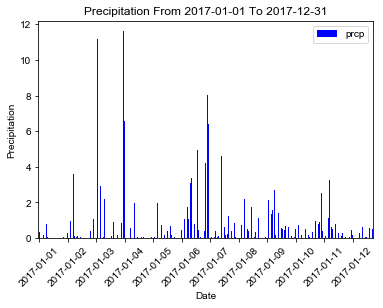

In [66]:
x_axis = np.arange(len(precipitation.prcp))
precipitation.plot.bar(color = 'blue')
plt.locator_params(axis='x', nbins=12)
plt.xticks(rotation=45)
plt.title("Precipitation From 2017-01-01 To 2017-12-31")
plt.xlabel("Date")
plt.ylabel("Precipitation")
sns.set()
plt.savefig('precipitation.png')
plt.show()

In [69]:
# summary statistics for prcipitation data
precipitation.describe()

,prcp
count,235.000000
mean,0.894596
std,1.814454
min,0.000000
25%,0.025000
50%,0.200000
75%,0.820000
max,11.620000


# Station Analysis:

In [70]:
# Total number of stations
total_stations = session.query(Station).group_by(Station.id).count()
total_stations

9

In [71]:
#Stations and Observation counts in descending order
results = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [34]:
#Station with highest observations:
('USC00519281', 2772)

In [72]:
#Last 12 months of temperature observations data filtered by highest numbers of observations
results_obs = session.query(Measurement.date, Measurement.tobs).\
              filter(Measurement.station == 'USC00519281').\
              filter(Measurement.date >= '2017-01-01', Measurement.date <= '2017-12-31').\
              order_by(Measurement.date.asc()).all()
results_obs[:5]

[('2017-01-01', 72),
 ('2017-01-02', 70),
 ('2017-01-03', 64),
 ('2017-01-04', 63),
 ('2017-01-05', 63)]

In [73]:
#unpack the tuples
temp = [i[1] for i in results_obs]
temp[:5]

[72, 70, 64, 63, 63]

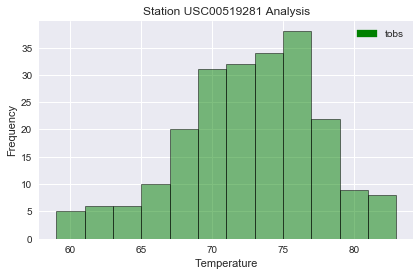

In [74]:
import matplotlib.patches as mpatches
plt.hist(temp, bins=12, align='mid', alpha=0.5, edgecolor='black', linewidth='1',color='green')
plt.title("Station " + "USC00519281" + " Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
green_patch = mpatches.Patch(color='green', label='tobs')
plt.legend(handles=[green_patch])
plt.tight_layout()
plt.savefig('temp_hist.png')
plt.show()

# Temperature Analysis:

In [75]:
# Function calc_temp
def calc_temp(start_date, end_date):
    temp_data = session.query(func.max(Measurement.tobs),func.avg(Measurement.tobs),func.min(Measurement.tobs)).\
                       filter(Measurement.date >= start_date, Measurement.date <= end_date).one()
    return temp_data
    

In [76]:
tempmin, tempmax, tempmean = calc_temp('2017-01-01', '2017-12-31')
tempmin, tempmax, tempmean

(87, 74.02052091554854, 58)

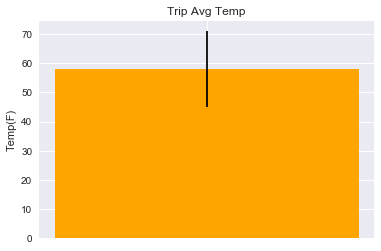

In [77]:
x = ['']
mean = [tempmean]
variance = [tempmax - tempmin]
x_pos = x
plt.bar(x_pos, mean, color='orange', yerr=variance)
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.xticks(x_pos, x)
plt.savefig('temp_avg.png')
plt.show()